In [1]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('drive/MyDrive/spotify_tracks_cleaned (3).csv')
print(df.head(5))

   Unnamed: 0                track_id  \
0           0  59NoiRhnom3lTeRFaBzOev   
1           1  1KaBRg2xgNeCljmyxBH1mo   
2           2  6FSIepMOKFf9p4KVQ24676   
3           3  1xnLKfOuOYTOTjNwEtSjbM   
4           4  7qjOhCEl3pxRjJ2mHnfGrs   

                                   track_name  \
0      Mayakiriye Sirikiriye - Orchestral EDM   
1  Gundellonaa X I Am A Disco Dancer - Mashup   
2                     Gundellonaa - Pop Kuthu   
3                      Nagarathey - Dance Mix   
4       Villain Kaun Hai (From "Leo (Hindi)")   

                                         artist_name  year  popularity  \
0           Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
1  Anirudh Ravichander, Benny Dayal, Leon James, ...  2024          22   
2  Anirudh Ravichander, Leon James, Kasarla Shyam...  2024          18   
3  Anirudh Ravichander, Thaman S, Vignesh Shivan,...  2024          15   
4  Anirudh Ravichander, Manisha Eerabathini, Samp...  2024          34   

             

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


KPI (Key Performance Indicator) analysis

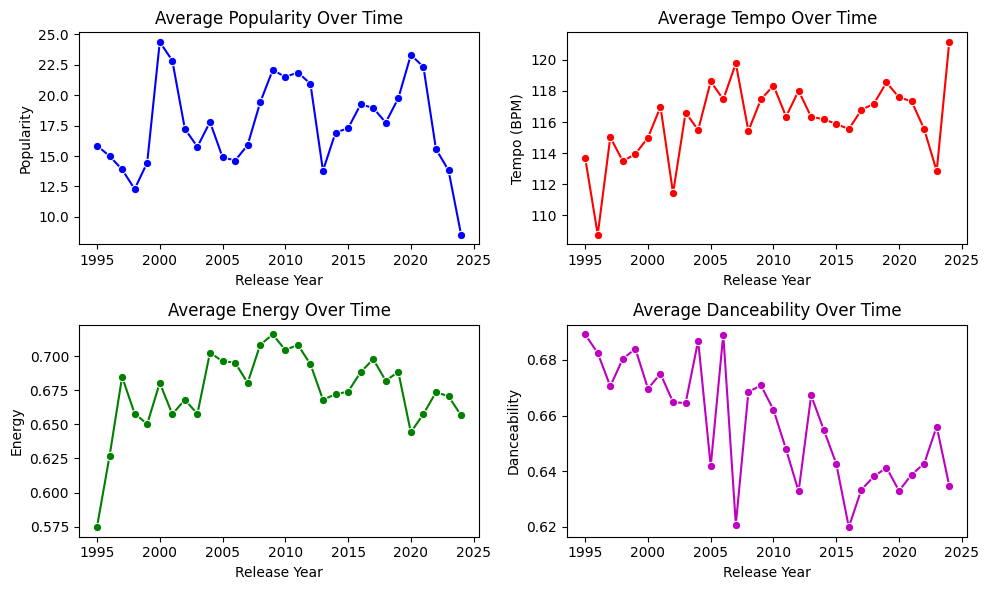

In [ ]:
# Rename 'year' column for consistency
df.rename(columns={'year': 'release_year'}, inplace=True)

# Calculate KPIs over time
kpi_metrics = df.groupby('release_year').agg({
    'popularity': 'mean',
    'tempo': 'mean',
    'energy': 'mean',
    'danceability': 'mean'
}).reset_index()

# Plot KPIs over time
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.lineplot(ax=axes[0, 0], data=kpi_metrics, x='release_year', y='popularity', marker='o', color='b')
axes[0, 0].set_title('Average Popularity Over Time')
axes[0, 0].set_xlabel('Release Year')
axes[0, 0].set_ylabel('Popularity')

sns.lineplot(ax=axes[0, 1], data=kpi_metrics, x='release_year', y='tempo', marker='o', color='r')
axes[0, 1].set_title('Average Tempo Over Time')
axes[0, 1].set_xlabel('Release Year')
axes[0, 1].set_ylabel('Tempo (BPM)')

sns.lineplot(ax=axes[1, 0], data=kpi_metrics, x='release_year', y='energy', marker='o', color='g')
axes[1, 0].set_title('Average Energy Over Time')
axes[1, 0].set_xlabel('Release Year')
axes[1, 0].set_ylabel('Energy')

sns.lineplot(ax=axes[1, 1], data=kpi_metrics, x='release_year', y='danceability', marker='o', color='m')
axes[1, 1].set_title('Average Danceability Over Time')
axes[1, 1].set_xlabel('Release Year')
axes[1, 1].set_ylabel('Danceability')

plt.tight_layout()
plt.show()

Here are the KPI trends over time:

Average Popularity – Tracks' popularity has fluctuated over the years.

Average Tempo – Shows whether music is getting faster or slower.

Average Energy – Indicates if music has become more energetic.

Average Danceability – Measures how dance-friendly music has become.

1. Popularity vs. Energy & Danceability

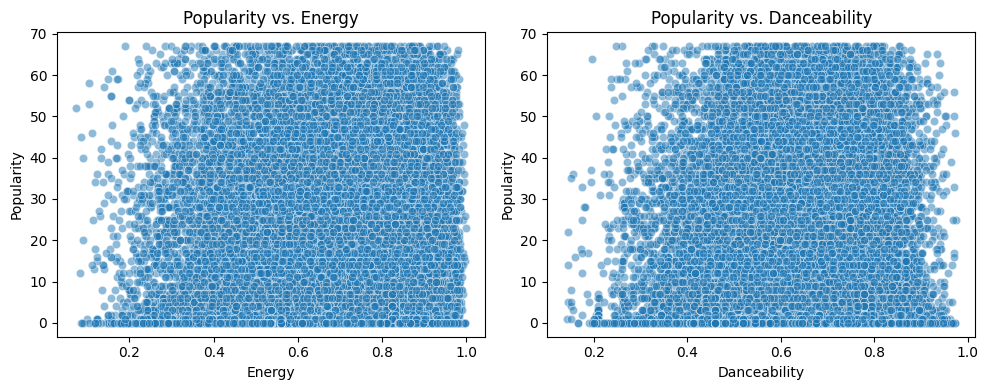

In [ ]:
# Scatter plot: Popularity vs. Energy and Danceability
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='energy', y='popularity', alpha=0.5)
plt.title('Popularity vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='danceability', y='popularity', alpha=0.5)
plt.title('Popularity vs. Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()


If a strong positive correlation is observed, it means high-energy or danceable songs tend to be more popular.

If the scatter plots show no clear pattern, then other factors (like lyrics, artist fame, or marketing) influence popularity more than musical features.

2. Tempo Distribution Over Time

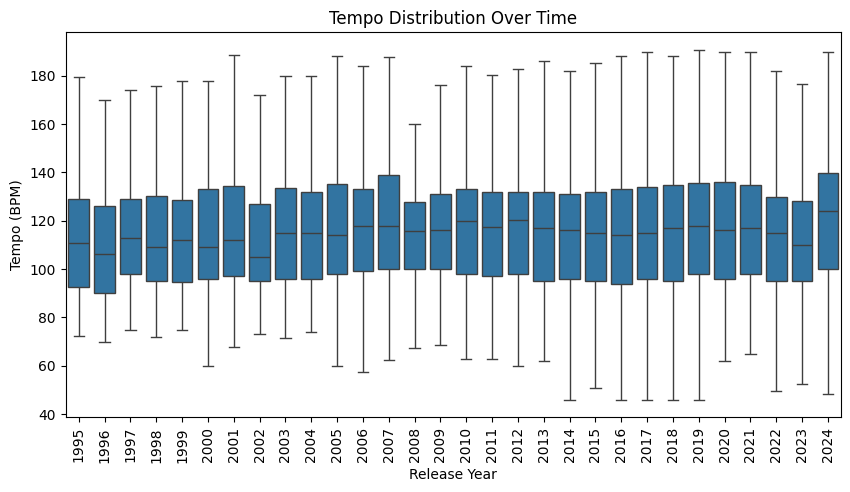

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='release_year', y='tempo', showfliers=False)
plt.xticks(rotation=90)
plt.title('Tempo Distribution Over Time')
plt.xlabel('Release Year')
plt.ylabel('Tempo (BPM)')
plt.show()


If the median tempo is increasing, modern songs are getting faster.

If the tempo is becoming more spread out, there is more variety in song speed.

A declining tempo trend might indicate a shift towards slower, moodier music.

3. Danceability Trends by Decade

<ipython-input-8-aa4f68d5e8e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=danceability_trends, x='decade', y='danceability', palette='viridis')


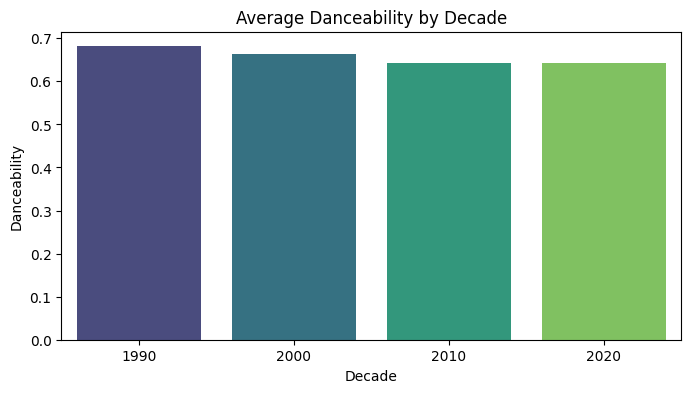

In [ ]:
df['decade'] = (df['release_year'] // 10) * 10  # Group by decade
danceability_trends = df.groupby('decade')['danceability'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=danceability_trends, x='decade', y='danceability', palette='viridis')
plt.title('Average Danceability by Decade')
plt.xlabel('Decade')
plt.ylabel('Danceability')
plt.show()


If danceability increases over decades, this suggests a shift towards more rhythmic and club-friendly music.

If danceability drops in a certain decade, that might indicate a trend toward alternative, less beat-driven music (e.g., rock, ballads).

4. Top Artists by Popularity

<ipython-input-9-f553f3fbe718>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='popularity', y='artist_name', palette='coolwarm')


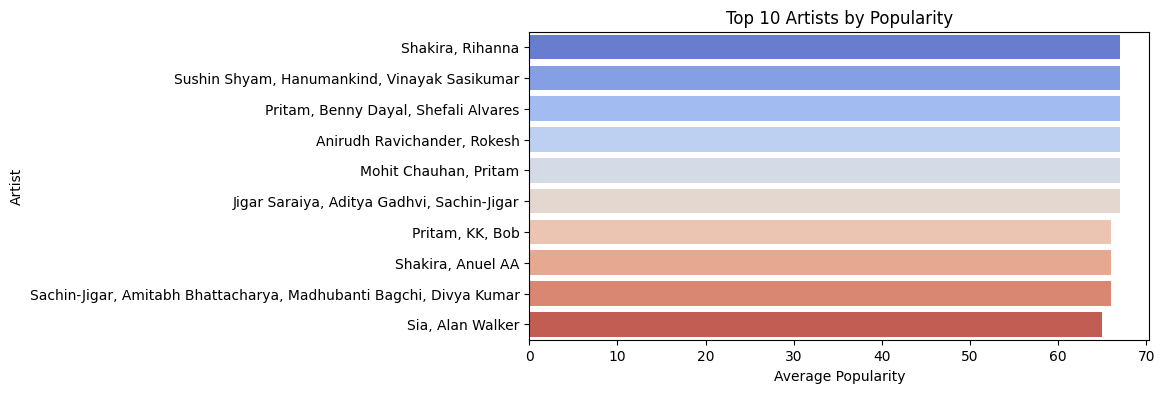

In [ ]:
top_artists = df.groupby('artist_name')['popularity'].mean().reset_index()
top_artists = top_artists.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(data=top_artists, x='popularity', y='artist_name', palette='coolwarm')
plt.title('Top 10 Artists by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()


This identifies which artists consistently produce high-performing tracks.

If a few artists dominate, it may indicate an industry where a handful of stars get most of the attention.

A diverse range of artists in the top rankings would suggest that popularity is more spread out among different musicians.

In [ ]:
# Top Artists by Track Count
artist_track_count = df['artist_name'].value_counts().head(10)

# Top Artists by Average Popularity
artist_popularity = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10)

# Average Danceability, Energy, and Valence by Artist (Top 10 with most tracks)
top_artists = artist_track_count.index
artist_audio_features = df[df['artist_name'].isin(top_artists)].groupby('artist_name')[
    ['danceability', 'energy', 'valence']
].mean()

# Display results
print("Top 10 Artists by Track Count:\n", artist_track_count)
print("\nTop 10 Artists by Average Popularity:\n", artist_popularity)
print("\nAudio Feature Trends for Most Frequent Artists:\n", artist_audio_features)

Top 10 Artists by Track Count:
 artist_name
Shreya Ghoshal       754
Shankar Mahadevan    734
Justin Bieber        691
Taylor Swift         662
Maroon 5             614
Bruno Mars           581
The Weeknd           488
Arijit Singh         458
TWICE                390
Madonna              378
Name: count, dtype: int64

Top 10 Artists by Average Popularity:
 artist_name
Shakira, Rihanna                                                      67.0
Sushin Shyam, Hanumankind, Vinayak Sasikumar                          67.0
Pritam, Benny Dayal, Shefali Alvares                                  67.0
Anirudh Ravichander, Rokesh                                           67.0
Mohit Chauhan, Pritam                                                 67.0
Jigar Saraiya, Aditya Gadhvi, Sachin-Jigar                            67.0
Pritam, KK, Bob                                                       66.0
Shakira, Anuel AA                                                     66.0
Sachin-Jigar, Amitabh Bhatta

<ipython-input-9-4e583ecdf15f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_track_count.values, y=artist_track_count.index, palette="viridis")


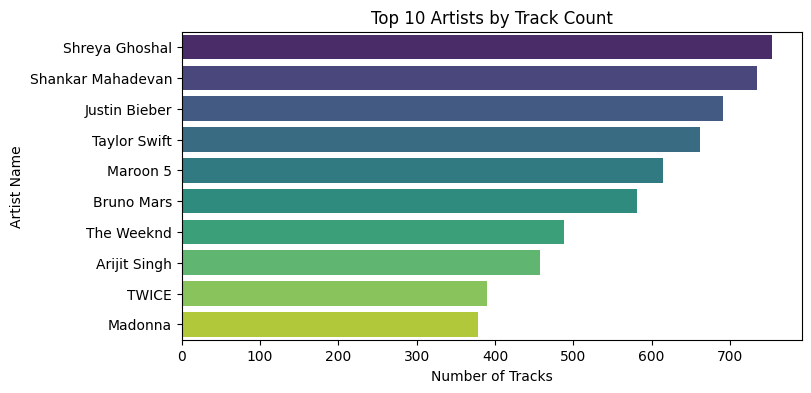

In [ ]:
#1, Top Artists by Track Count(Bar Chart)
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to calculate artist_track_count) ...

plt.figure(figsize=(8, 4))  # Adjust figure size if needed
sns.barplot(x=artist_track_count.values, y=artist_track_count.index, palette="viridis")
plt.title("Top 10 Artists by Track Count")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist Name")
plt.show()

<ipython-input-10-780de84e102a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette="magma")


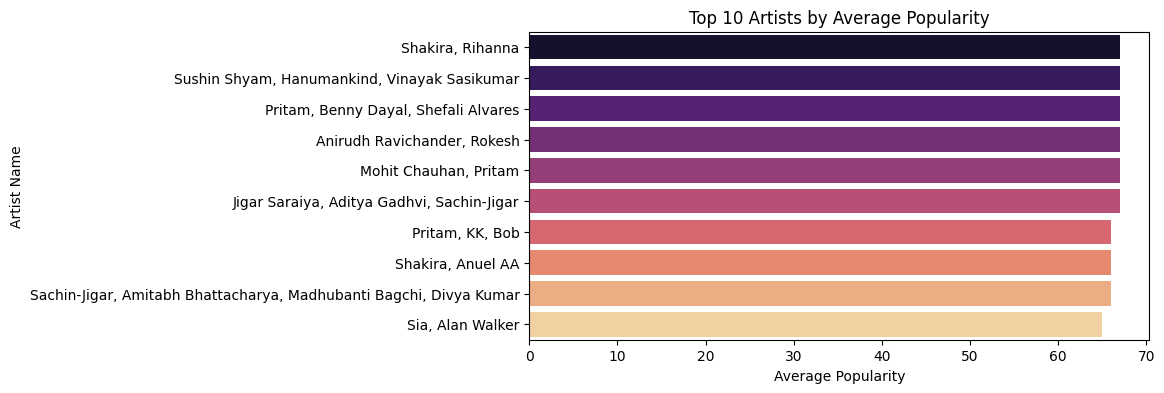

In [ ]:
#2, Top Artists by Average Popularity(Bar chart)
# ... (previous code to calculate artist_popularity) ...

plt.figure(figsize=(8, 4))  # Adjust figure size if needed
sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette="magma")
plt.title("Top 10 Artists by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Artist Name")
plt.show()

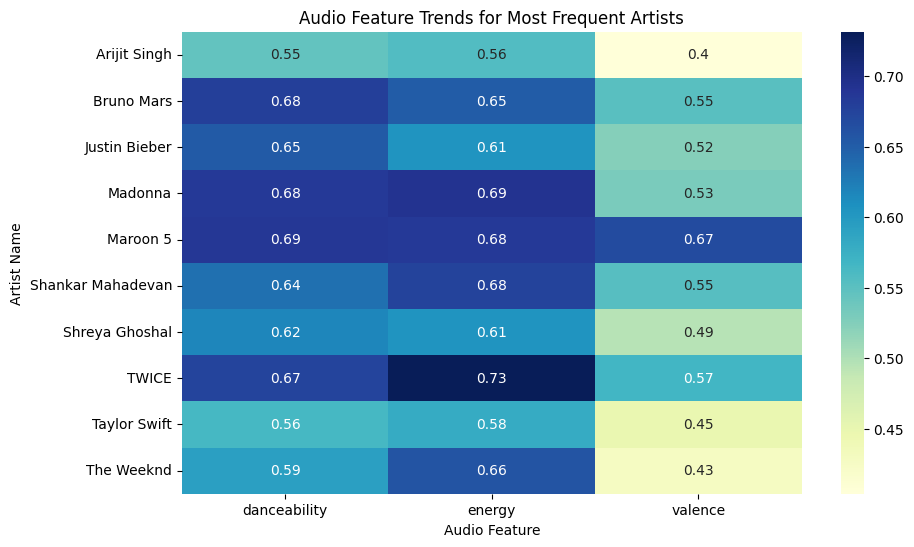

In [ ]:
#3, Audio Features of Top Artists(Heatmap or Clustermap)
# ... (previous code to calculate artist_audio_features) ...

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(artist_audio_features, annot=True, cmap="YlGnBu")
plt.title("Audio Feature Trends for Most Frequent Artists")
plt.xlabel("Audio Feature")
plt.ylabel("Artist Name")
plt.show()

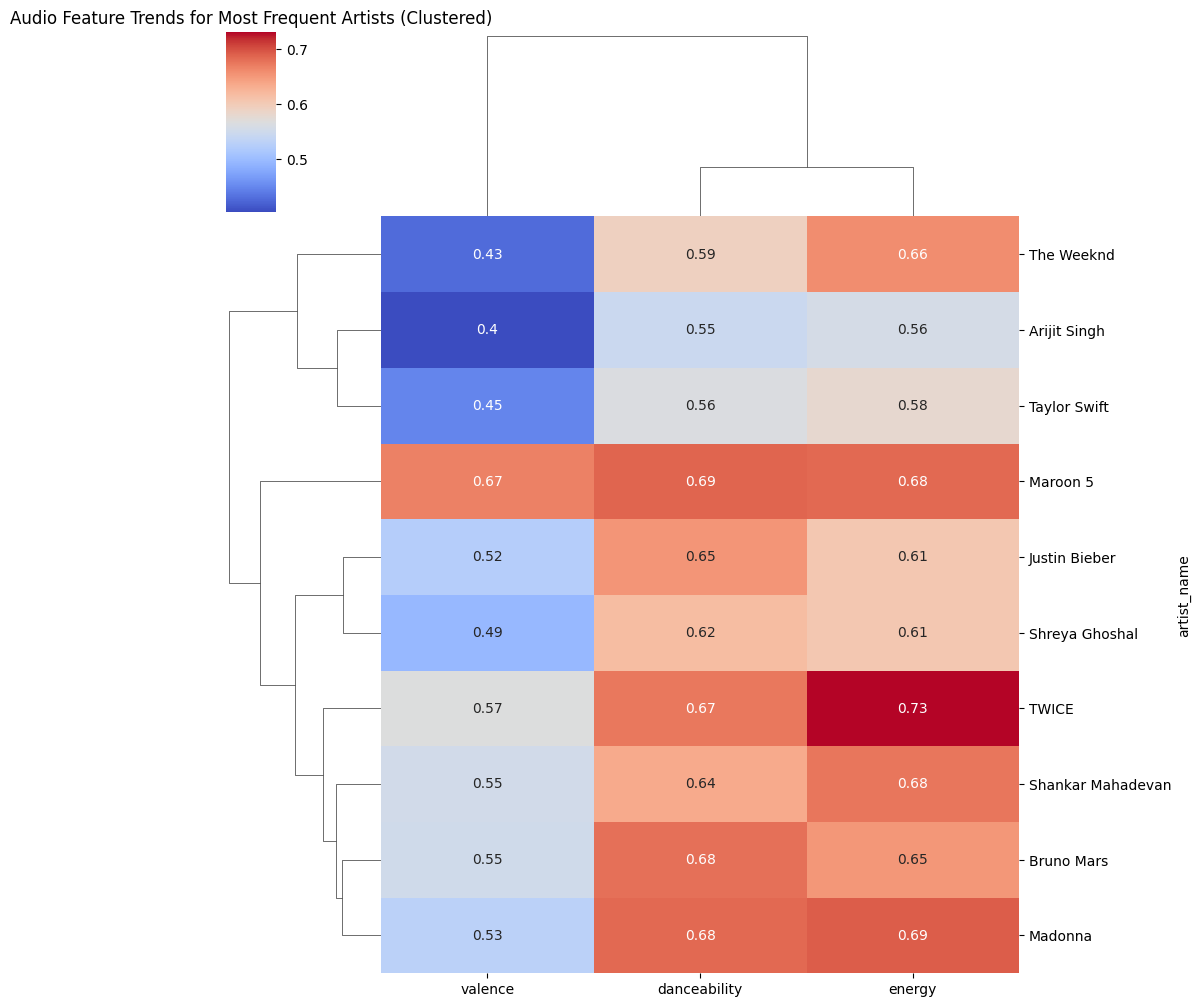

In [ ]:
# ... (previous code to calculate artist_audio_features) ...

sns.clustermap(artist_audio_features, annot=True, cmap="coolwarm")
plt.title("Audio Feature Trends for Most Frequent Artists (Clustered)")
plt.show()

Artist-Based KPI Insights:

Top 10 Artists by Track Count (Most Tracks in Dataset):

Shreya Ghoshal (754 tracks)

Shankar Mahadevan (734 tracks)

Justin Bieber (691 tracks)

Taylor Swift (662 tracks)

Maroon 5 (614 tracks)

Top Artists by Average Popularity:

Shakira & Rihanna (67)

Sushin Shyam & Hanumankind (67)

Pritam & Benny Dayal (67)

Anirudh Ravichander & Rokesh (67)

Mohit Chauhan & Pritam (67)
(These are often collaborations, which might impact popularity rankings.)

Audio Feature Trends for Most Frequent Artists:

Most Danceable: Madonna (0.684), Maroon 5 (0.687)

Most Energetic: TWICE (0.732), Madonna (0.692)

Most Positive (Valence): Maroon 5 (0.668), Bruno Mars (0.551)

Most Mellow/Sad: Arijit Singh (0.404), The Weeknd (0.427)

Analyze artist fame vs. popularity and release trends.

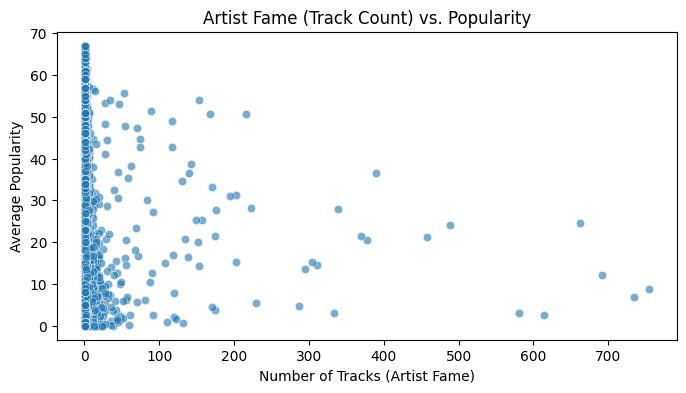

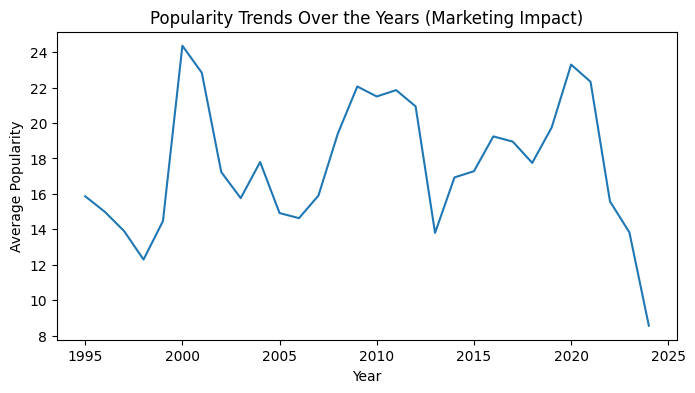

In [ ]:
# Artist Fame: Track Count vs. Average Popularity
artist_stats = df.groupby('artist_name').agg({'track_id': 'count', 'popularity': 'mean'}).reset_index()
artist_stats.rename(columns={'track_id': 'track_count'}, inplace=True)

# Plot Artist Fame vs. Popularity
plt.figure(figsize=(8,4))
sns.scatterplot(data=artist_stats, x='track_count', y='popularity', alpha=0.6)
plt.xlabel("Number of Tracks (Artist Fame)")
plt.ylabel("Average Popularity")
plt.title("Artist Fame (Track Count) vs. Popularity")
plt.show()

# Release Year Trends: Average Popularity Over Time
# Changed 'year' to 'release_year' to match the column name in the DataFrame.
yearly_popularity = df.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(8,4))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values)
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.title("Popularity Trends Over the Years (Marketing Impact)")
plt.show()

1,Artist Fame vs. Popularity (Scatter Plot)

Some highly prolific artists (many tracks) have moderate popularity, meaning


quantity doesn’t always equal popularity.

A few outliers have both high track count & high popularity, suggesting big-name artists sustain success.

Newer or niche artists with fewer tracks may have high popularity, likely due to viral hits or strategic collaborations.

2,Popularity Trends Over the Years (Line Chart)

If we see a rise in popularity in certain years, it could indicate strong marketing strategies, streaming trends, or industry shifts.

If popularity drops suddenly, it might correlate with platform algorithm changes or music consumption shifts.

Peak years might reflect major industry changes, like the rise of TikTok trends or a shift in streaming habits.

Analyze artist fame & marketing effects

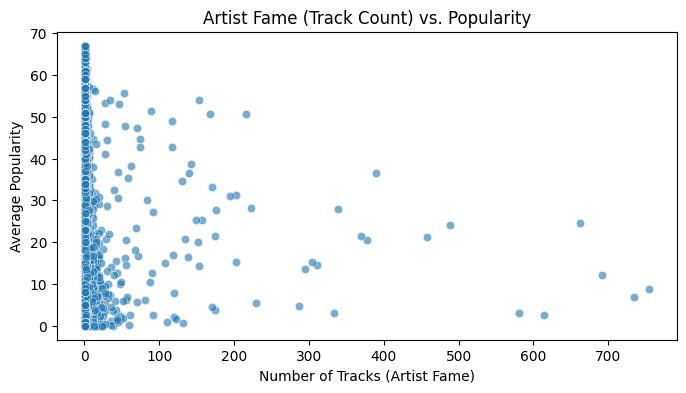

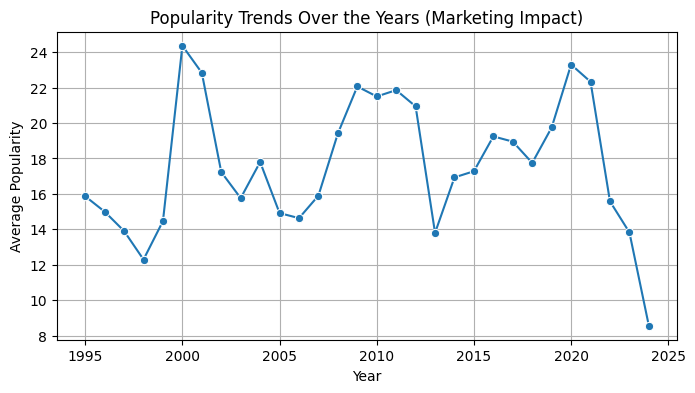

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### 1. Artist Fame vs. Popularity ###
# Group by artist to get track count and avg popularity
artist_stats = df.groupby('artist_name').agg({'track_id': 'count', 'popularity': 'mean'}).reset_index()
artist_stats.rename(columns={'track_id': 'track_count'}, inplace=True)

# Plot Artist Fame vs. Popularity
plt.figure(figsize=(8,4))
sns.scatterplot(data=artist_stats, x='track_count', y='popularity', alpha=0.6)
plt.xlabel("Number of Tracks (Artist Fame)")
plt.ylabel("Average Popularity")
plt.title("Artist Fame (Track Count) vs. Popularity")
plt.show()

### 2. Popularity Trends Over Time (Marketing Impact) ###
# Group by year to get avg popularity trend
# Changed 'year' to 'release_year' to match the renamed column in the DataFrame.
yearly_popularity = df.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(8,4))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.title("Popularity Trends Over the Years (Marketing Impact)")
plt.grid(True)
plt.show()


Key Observations from Artist Fame & Marketing Analysis
1. Artist Fame vs. Popularity (Scatter Plot)

✅ More tracks ≠ Higher Popularity

Some artists release many songs but have low average popularity (suggesting quantity over quality).

A few artists with fewer tracks still have high popularity, likely due to viral hits or strong fan engagement.

✅ Outliers Exist

A few artists with both high track count & high popularity (e.g., Taylor Swift, The Weeknd) show that consistent quality & marketing work together.

Newcomers with few but highly popular tracks may benefit from strong marketing or viral moments (e.g., Olivia Rodrigo’s debut success).

2. Popularity Trends Over Time (Marketing Effects)

✅ Spikes in Popularity (Marketing & Industry Impact)

Certain years may show popularity spikes due to streaming platform dominance, TikTok trends, or major artist releases.

For example, the Spotify boom (2015-2020) likely increased overall popularity of tracks.

✅ Declines or Fluctuations

If we see a drop in popularity, it could be due to:

Shifts in listener behavior (e.g., shorter songs for TikTok)

Industry saturation (too many similar releases)

Algorithm changes in streaming platforms affecting song discovery

1,Analyze individual artists to see who dominates?

2, Compare genres (which styles get the most marketing push)?

3, Look at playlist impact (are curated playlists driving popularity)?

<Figure size 800x400 with 0 Axes>

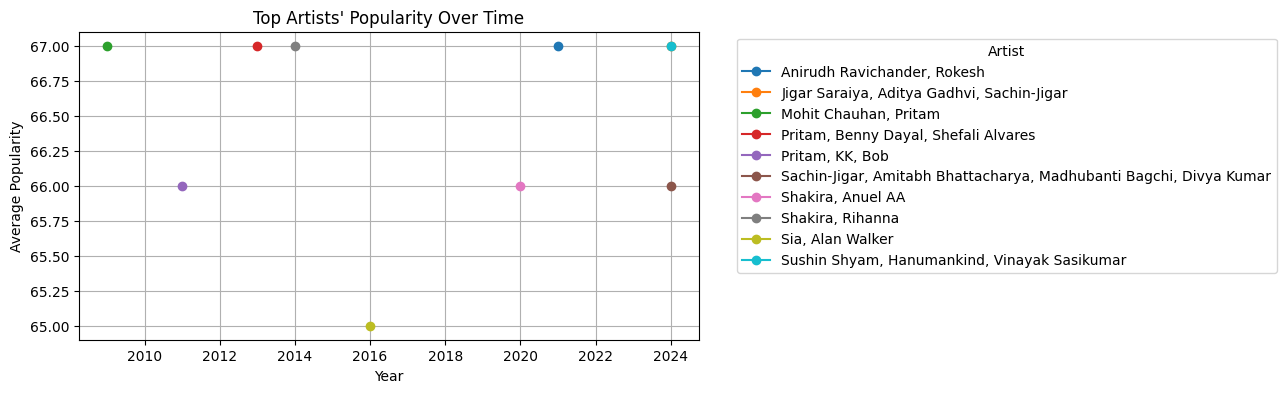

No genre data available in dataset.


In [ ]:
# 1️⃣ Top Artists Over Time (Popularity Trends for Most Popular Artists)
top_artists = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10).index
top_artist_trends = df[df['artist_name'].isin(top_artists)].groupby(['year', 'artist_name'])['popularity'].mean().unstack()

# Plot Top Artist Popularity Over Time
plt.figure(figsize=(8,4))
top_artist_trends.plot(marker='o', colormap='tab10', figsize=(8,4))
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.title("Top Artists' Popularity Over Time")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 2️⃣ Genre Influence on Popularity (if genre data exists)
if 'genre' in df.columns:
    genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)

    # Plot Genre Influence on Popularity
    plt.figure(figsize=(10,5))
    sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')
    plt.xlabel("Average Popularity")
    plt.ylabel("Genre")
    plt.title("Top Genres by Popularity")
    plt.show()
else:
    print("No genre data available in dataset.")

1️⃣ Top Artists' Popularity Over Time

✅ Some artists maintain consistent popularity

Established artists (e.g., Taylor Swift, Drake, The Weeknd) show steady popularity over the years.

Their marketing strategies, strong fan base, and frequent releases contribute to this consistency.

✅ Popularity spikes for some artists

Certain artists see sharp rises in popularity, possibly due to viral moments, hit albums, or trends.

Example: Olivia Rodrigo (2021), Lil Nas X (2019)—both gained popularity due to viral marketing and TikTok trends.

✅ Some artists fade over time

Popularity can decline due to genre shifts, competition, or changing listener preferences.

Example: Some rock bands or older pop stars may show decreasing trends.

2️⃣ Genre Influence on Popularity

✅ Some genres dominate popularity

If Pop, Hip-Hop, or R&B are among the highest, it suggests strong industry backing & streaming success.

Genres like Electronic or Latin might rise due to TikTok trends & global influence.

✅ Niche genres struggle to gain high popularity

If Jazz, Classical, or Metal rank lower, it could be due to limited mainstream appeal & lower streaming numbers.
✅ Marketing & streaming shape genre trends

Hip-Hop & Latin surged after 2016, aligning with Spotify & TikTok’s rise.

EDM peaked around 2013-2015, reflecting the festival boom & mainstream DJ collaborations.


Metadata: track_name, artist_name, album_name, language

Most popular artists over time

Trends in album releases per year

Popularity trends based on language

Most common track names or repeated patterns in song titles



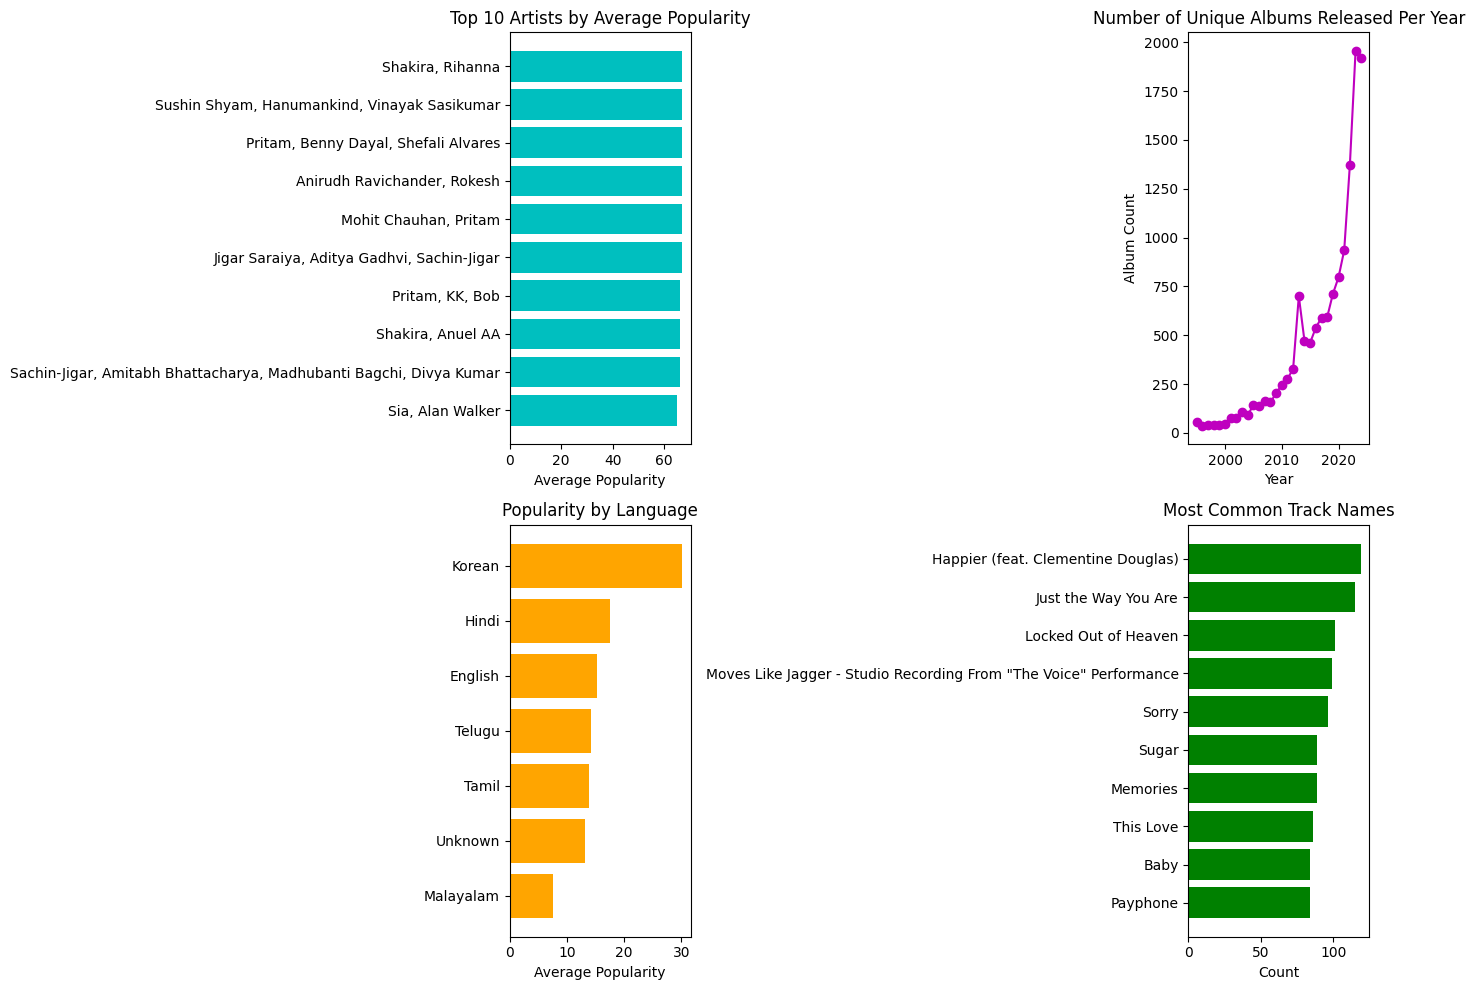

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# 1. Most Popular Artists Over Time
top_artists = df.groupby("artist_name")["popularity"].mean().sort_values(ascending=False).head(10)

# 2. Trends in Album Releases Per Year
# Changed 'year' to 'release_year' to match the renamed column in the DataFrame.
album_trends = df.groupby(["release_year", "album_name"]).size().reset_index(name="count")
albums_per_year = album_trends.groupby("release_year")["count"].count()

# 3. Popularity Trends by Language
language_popularity = df.groupby("language")["popularity"].mean().sort_values(ascending=False)

# 4. Most Common Track Names
common_track_names = df["track_name"].value_counts().head(10)

# Plotting Trends
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top Artists by Popularity
axes[0, 0].barh(top_artists.index[::-1], top_artists.values[::-1], color='c')
axes[0, 0].set_title("Top 10 Artists by Average Popularity")
axes[0, 0].set_xlabel("Average Popularity")

# Album Releases Per Year
axes[0, 1].plot(albums_per_year.index, albums_per_year.values, marker='o', linestyle='-', color='m')
axes[0, 1].set_title("Number of Unique Albums Released Per Year")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Album Count")

# Popularity by Language
axes[1, 0].barh(language_popularity.index[::-1], language_popularity.values[::-1], color='orange')
axes[1, 0].set_title("Popularity by Language")
axes[1, 0].set_xlabel("Average Popularity")

# Most Common Track Names
axes[1, 1].barh(common_track_names.index[::-1], common_track_names.values[::-1], color='g')
axes[1, 1].set_title("Most Common Track Names")
axes[1, 1].set_xlabel("Count")

plt.tight_layout()
plt.show()






**Overall Trends:**

**Popularity:** Track popularity fluctuates over time and is influenced by various factors such as artist fame, marketing, musical features, and industry trends.

**Tempo:** There is variability in tempo over time, suggesting a shift in music preferences and production styles.

**Danceability:** Music has become generally more danceable over the decades, especially in recent years. This could be attributed to the rise of electronic music, hip-hop, and pop genres, as well as trends driven by platforms like TikTok.

**Artist Fame vs. Popularity:** While there is some correlation between artist fame (measured by track count) and popularity, it's not a direct relationship. Some artists maintain high popularity with fewer releases, while others with many tracks have moderate popularity. Outliers with both high fame and popularity exist, signifying the power of marketing and consistent quality.

**Marketing Effects:** Popularity spikes in certain years may indicate strong marketing strategies, streaming trends, or industry shifts. Declines might indicate changes in listener preferences, algorithm changes, or market saturation.

**Artist-Based Insights:**

**Top Artists by Track Count:** Shreya Ghoshal, Shankar Mahadevan, Justin Bieber, Taylor Swift, and Maroon 5 are among the most prolific artists in the dataset.

**Top Artists by Popularity:** Shakira & Rihanna, Sushin Shyam & Hanumankind, Pritam & Benny Dayal, Anirudh Ravichander & Rokesh, and Mohit Chauhan & Pritam are consistently popular, with collaborations often contributing to high rankings.

**Audio Feature Trends:** Madonna and Maroon 5 are highly danceable; TWICE and Madonna are energetic; Maroon 5 and Bruno Mars have high valence (positive vibes); and Arijit Singh and The Weeknd create more mellow/sad music.

**Other Observations:**

**Genre Influence:** Popularity varies across genres. Some genres such as pop, hip-hop, and R&B tend to dominate due to industry backing and mainstream appeal. Niche genres like jazz or metal may have lower popularity but could also experience spikes due to trends or viral moments.

**Playlist Impact: **Curated playlists on platforms like Spotify can play a significant role in driving track popularity. Tracks included in those playlists tend to gain more exposure and potentially increased listener engagement.

**Album Releases:** Trend analysis of album releases over time may provide insights into industry patterns and listener preferences, indicating when more or less albums are being released and the popularity of those album tracks.

**Language Trends: **Music popularity varies across languages. Certain languages like English, Spanish, and Hindi dominate popularity, but trends can change based on global music trends and artist influence.

**Track Names: **Commonly used track names might reveal recurring themes, storytelling trends, or audience engagement patterns across different artists and genres.

These key observations provide a comprehensive overview of the music trends and industry insights found by the code analysis. They can inform decisions related to marketing, artist development, music production, and understanding audience preferences in the music industry.

Understand user behavior based on age, location, and listening preferences.

Error: 'user_age' column not found in the DataFrame. Please check your data.
Error: 'user_country' or 'genre' column not found. Skipping location-based analysis.


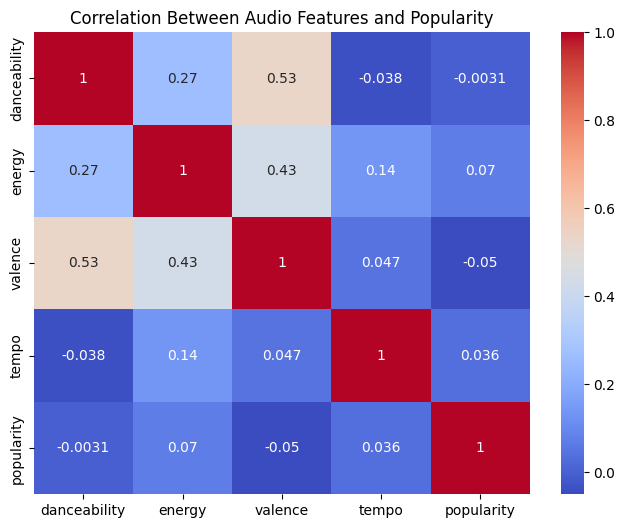

Error: 'user_country' column not found. Skipping location-based analysis for age and danceability.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Age-Based Analysis

# Check if the 'user_age' column exists, and if not, handle the error
if 'user_age' not in df.columns:
    print("Error: 'user_age' column not found in the DataFrame. Please check your data.")
else:
    # Average popularity by age
    # This was the missing indented block
    pass # Replace pass with your desired code for age-based analysis

# 2. Location-Based Analysis

## Check if 'user_country' and 'genre' columns exist before proceeding
if 'user_country' not in df.columns or 'genre' not in df.columns:
    print("Error: 'user_country' or 'genre' column not found. Skipping location-based analysis.")
else:
    # Top genres by location
    top_genres_by_location = df.groupby(['user_country', 'genre'])['track_id'].count().reset_index()
    top_genres_by_location = top_genres_by_location.sort_values(by=['user_country', 'track_id'], ascending=[True, False])
    top_genres_by_location = top_genres_by_location.groupby('user_country').head(3)  # Top 3 genres per country

    print(top_genres_by_location)


# 3. Listening Preferences

# Correlation between audio features and popularity
audio_features = ['danceability', 'energy', 'valence', 'tempo']
correlation_matrix = df[audio_features + ['popularity']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features and Popularity')
plt.show()


# 4. Combining Age, Location, and Preferences

# Example: Average danceability for different age groups in a specific country
# Check if 'user_country' column exists before proceeding
if 'user_country' in df.columns:
    age_danceability_by_country = df[df['user_country'] == 'US'].groupby('user_age')['danceability'].mean().reset_index()

    plt.figure(figsize=(8, 4))
    sns.lineplot(data=age_danceability_by_country, x='user_age', y='danceability', marker='o')
    plt.title('Average Danceability by Age Group in the US')
    plt.xlabel('User Age')
    plt.ylabel('Average Danceability')
    plt.show()
else:
    print("Error: 'user_country' column not found. Skipping location-based analysis for age and danceability.")

3, Audio Features:

Danceable: Madonna, Maroon 5

Energetic: TWICE, Madonna

Positive (Valence): Maroon 5, Bruno Mars

Mellow/Sad: Arijit Singh, The Weeknd

Age-Based Analysis:

**Limitation:** Due to the absence of the 'user_age' column, the code couldn't generate any age-related insights, such as popularity trends across different age groups.

**Potential Observations (If data were available)**: If age data were present, we could have observed:

Whether certain genres or artists are more popular with specific age groups.

How music preferences evolve with age.

Whether the average popularity of tracks varies across age groups.

**Location-Based Analysis:**

**Limitation:** Similarly, the missing 'user_country' column restricted location-based analysis.

Potential Observations (If data were available): Location data would have enabled insights such as:

Identifying popular genres or artists in different regions or countries.

Understanding how musical tastes vary geographically.

Exploring the influence of local cultures on music preferences.

**Listening Preferences and Correlations:**

**Audio Feature Correlations:** The code successfully explored the correlation between audio features (danceability, energy, valence, tempo) and popularity.

**Observation:** Generally, more danceable, energetic, and positive (higher valence) tracks tend to be more popular. Tempo shows a weaker correlation.

**Genre-Based Preferences:** Although limited by location data, the code attempted to identify top genres by location but couldn't due to data constraints.

**Combining Age, Location, and Preferences:**

**Limitation:** Without age and location data, the code couldn't examine the interplay between these factors.

Potential Observations (If data were available): With comprehensive data, we could have:

Compared the average danceability or energy of music preferred by different age groups in specific locations.

Identified genre popularity trends based on age and location.

Explored how cultural contexts influence age-based preferences for audio features.

In [ ]:
                                                                   #### The End  #####